## A notebook for EFTflag = 3, the designer mapping EFT

### Here we just show how to set the parameters of this flag, the details of description please see them in 0&1 exapmle and the markdown file in find_your_model file.

In [ ]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

camb_installation_path = './../' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)
print('camb path:', camb_path)
import camb
# camb.set_feedback_level(1)
from camb import model, initialpower

In [11]:
# Turn off all the stability checks firstly
stability_flag ={
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : True,
                'EFT_gradient_stability'     : True,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }

### CHOOSE EFT MODEL: 
#### EFTflag = 3 -> DesignerEFT, , using a theory whose background mimics exactly the one specified
There are three flags under DesignerEFT, the flag name is **DesignerEFTmodel**.
- DesignerEFTmodel = 1: f(R)
- DesignerEFTmodel = 2: minimally coupled quintessence
- DesignerEFTmodel = 4: RPHalphaDE

### 1. Designer f(R)

In [12]:
# Still use the GR case to compare
GR_params = {'EFTflag':0
            }

# designer f(R)
fR2_params = {'EFTflag':3,
                 'DesignerEFTmodel':1,
                #  'EFTwDE': 2,'EFTw0': -0.43,'EFTwa': -0.86,
                 'EFTB0' :1e-1,              
                 }
fR2_params.update(stability_flag)

fR5_params = {'EFTflag':3,
                 'DesignerEFTmodel':1,
                #  'EFTwDE': 2,'EFTw0': -0.43,'EFTwa': -0.86,
                 'EFTB0' :1e-5,              
                 }
fR5_params.update(stability_flag)

In [13]:
model_key = ['GR', 'fR2', 'fR5'] 
model_par = [GR_params, fR2_params, fR5_params] # list of dictionaries with the parameters
Model = dict(zip(model_key,model_par))    # dictionary with the models, be careful for differring from camb.model

#### See how many extra parameters you have, and how they are called and their values:

In [14]:
for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: fR2
['B0']
['B_0']
[0.1]
Model: fR5
['B0']
['B_0']
[1e-05]


#### Move to get some results

In [15]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: fR2
***************************************************************
 EFTCAMB designer f(R) background solver

The age of the universe for fR2:  13.812291011516189
CosmoMC theta_MC parameter for fR2: 0.01041714773853369 

Model: fR5
***************************************************************
 EFTCAMB designer f(R) background solver

The age of the universe for fR5:  13.812291011516189
CosmoMC theta_MC parameter for fR5: 0.01041714773853369 



***************************************************************
 EFTCAMB designer f(R) background solver

***************************************************************
 EFTCAMB designer f(R) background solver



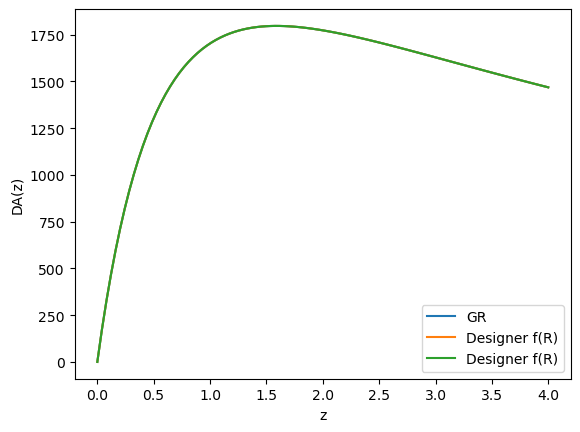

In [16]:
z = np.linspace(0,4,100)
labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

#### Second, give the CMB Cls.

In [17]:
toplot_totCL = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    Cls =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=Cls['total']
    # unlensedCL=Cls['unlensed_scalar']
    toplot_totCL.append(totCL)
    

***************************************************************
 EFTCAMB designer f(R) background solver

***************************************************************
 EFTCAMB designer f(R) background solver

***************************************************************
 EFTCAMB designer f(R) background solver

***************************************************************
 EFTCAMB designer f(R) background solver



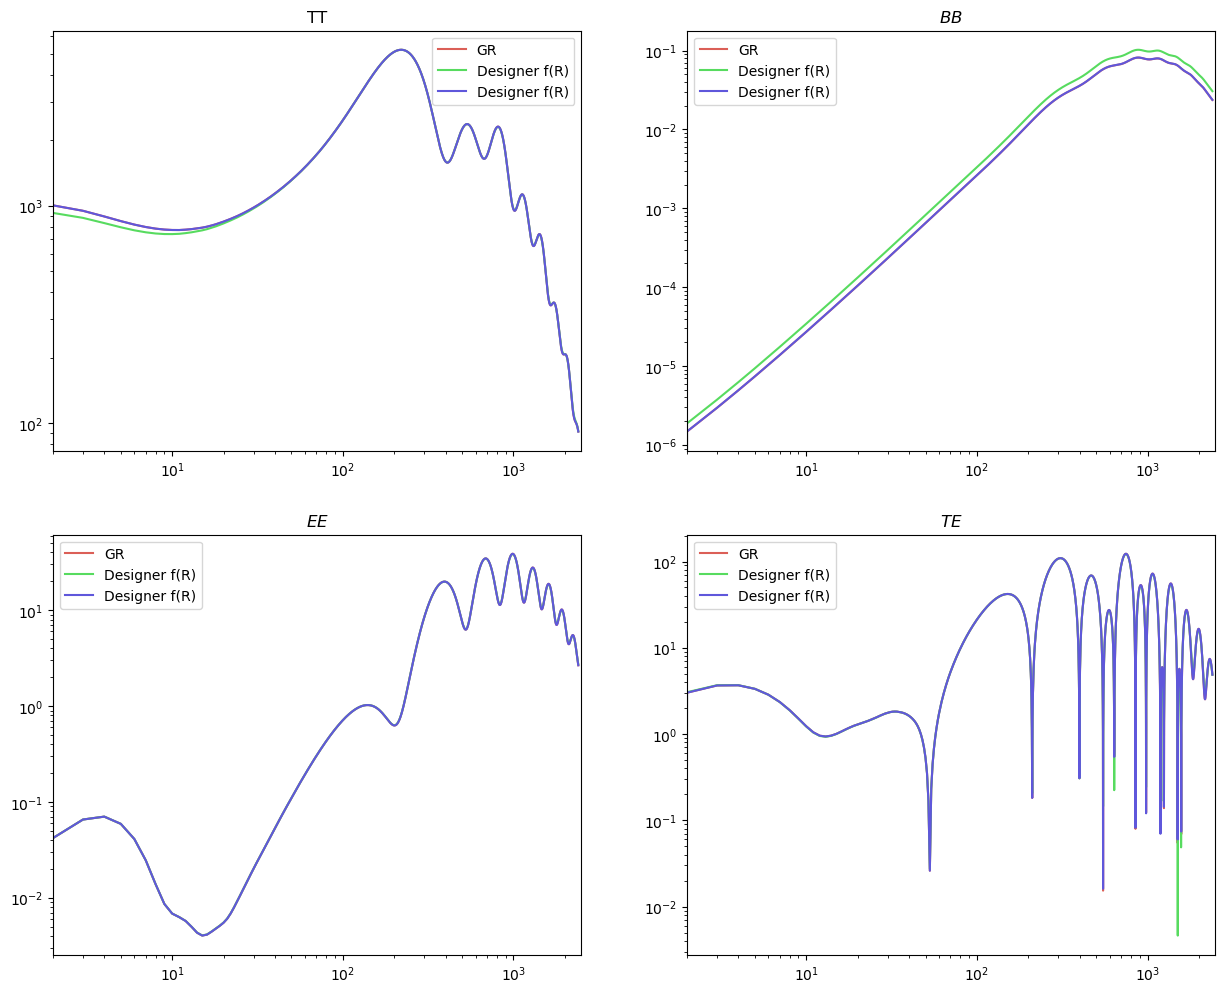

In [18]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(Model))

for CLS,c,lab in zip(toplot_totCL,color,labs):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);